In [24]:
import matplotlib.pyplot as plt
import numpy as np
import flet as ft
import io
import base64
from pylsl import StreamInlet, resolve_stream
from scipy.signal import welch
import pyxdf

In [25]:
from scipy.signal import butter, lfilter, welch, filtfilt
# Create a function to design a filter (function output b, a = filter coefficients)
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs # define nyquist frequency
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [26]:
fs = 250
lowcut = 0.5
highcut = 25
order = 4


(8, 4000)


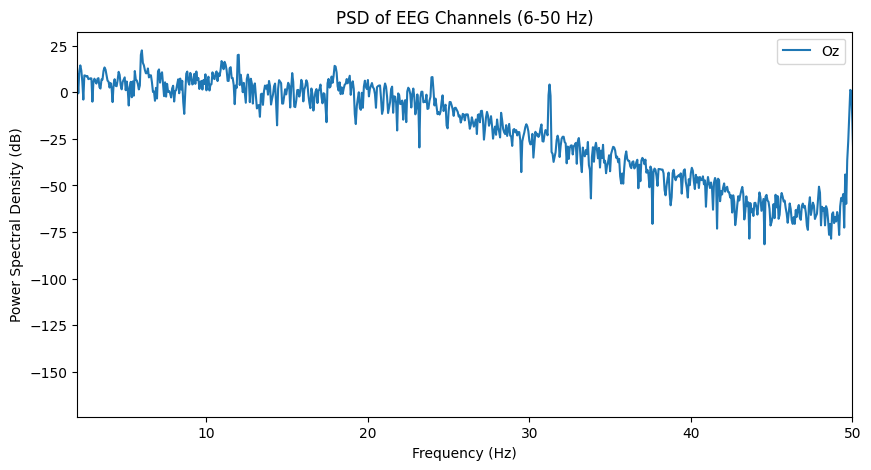

In [33]:
streams, header = pyxdf.load_xdf('../../data_ssvep/Toey/SSVEP_data/6Hz/6hz_1')
raw_data = streams[0]["time_series"].T #From Steam variable this query is EEG data
data = raw_data[:, 8000:12000]
b, a = butter_bandpass(lowcut, highcut, fs, order)

filtered_data = filtfilt(b,a, data)
print(filtered_data.shape)
selected_channels = ['Oz']  # เลือกช่องที่ต้องการพล็อต
channels = ['Oz', 'Pz', 'O2', 'O1', '-', '-', '-', '-']
                
plt.figure(figsize=(10, 5))  # สร้างกราฟเพียงครั้งเดียว
for selected_channel in selected_channels:
    channel_index = channels.index(selected_channel)
    f, Pxx = welch(filtered_data[channel_index], fs=250, nperseg=len(data[channel_index]))
    psds_mean = np.mean(Pxx)

    plt.plot(f, 10 * np.log10(Pxx), label=f'{selected_channel}')  # เพิ่ม label ให้แต่ละช่อง

    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density (dB)')
    plt.title('PSD of EEG Channels (6-50 Hz)')
    # plt.axvline(x=6, color='r', linestyle='--')  # เปลี่ยนเส้นเป็นเส้นประ
    plt.legend()
    plt.xlim([2, 50])
    plt.legend()
    # plt.xlim([2, 50])

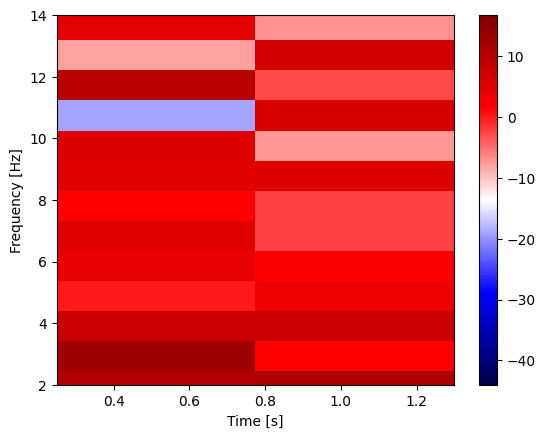

In [28]:
######### Plot time freq #############
from scipy.signal import spectrogram
import numpy as np
import mne

selected_channels = ['O2']  # เลือกช่องที่ต้องการพล็อต
channel_index = channels.index(selected_channel)
fig, ax = plt.subplots()
# NFFT = 256
f, t, Sxx = spectrogram(filtered_data[channel_index][1000:1500], fs = fs , noverlap= fs//2)
plt.ylim([2, 14])             # ... set the frequency range,
plt.pcolormesh(t, f, 10 * np.log10(Sxx), cmap='seismic')   # Plot the result
plt.xlabel('Time [s]')        # ... and label the axes
plt.ylabel('Frequency [Hz]')
plt.colorbar()                # ... with a color bar,
plt.clim([200, -40])
plt.show()